# Bacterium size estimate

In this notebook, I do an estimate on E. coli size. The measurement is based on the image below of a single layer of dried E. coli on a glass substrate. 
<img src='temp_data\measure-bacteria.jpg'>
Scale bar is 10 um.

In [27]:
from skimage import io, measure, filters
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import bpass
import pandas as pd
import matplotlib.patches as mpatch

In [106]:
img = io.imread(r'temp_data\measure-bacteria.tif')
bp = bpass(img, 10, 200)

(-0.5, 584.5, 494.5, -0.5)

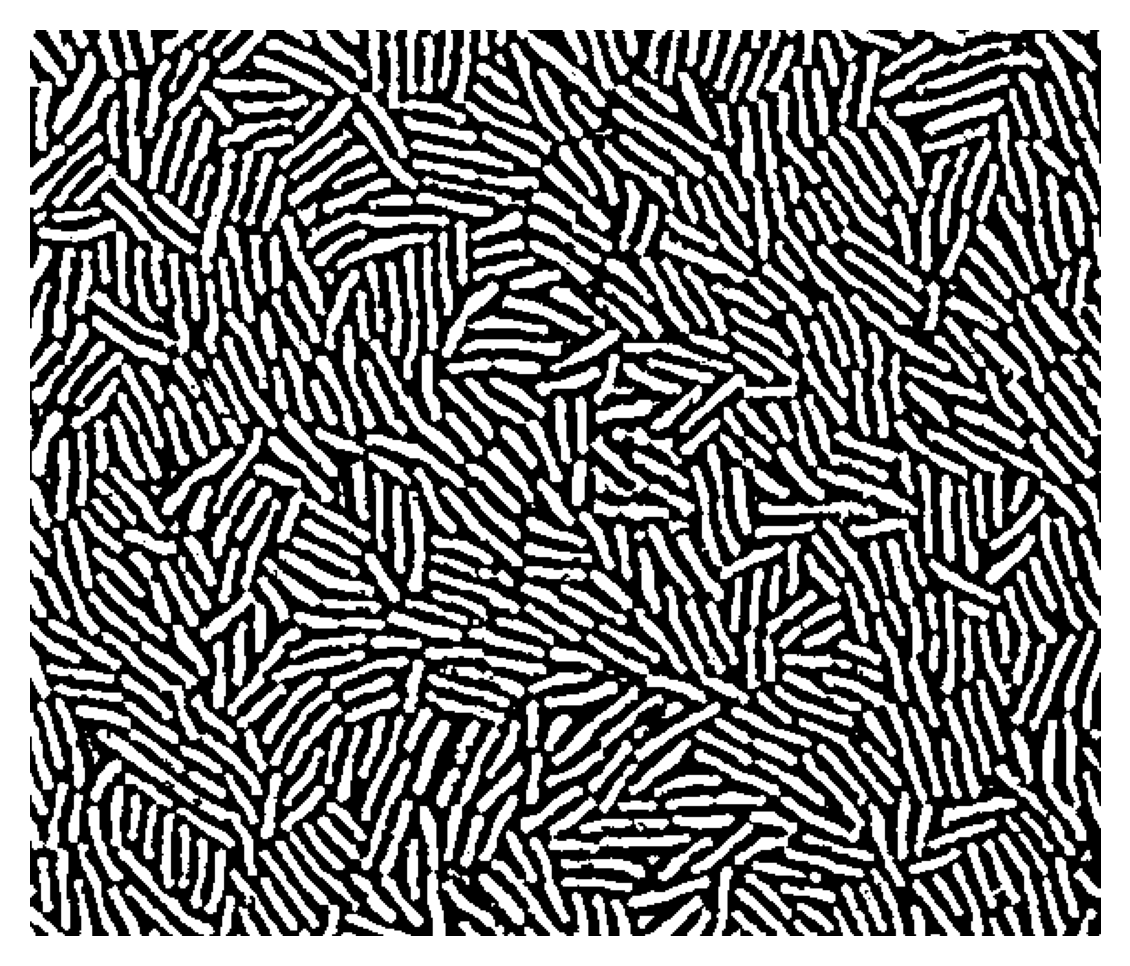

In [54]:
# choose minimum filter
filt = filters.threshold_minimum(bp)
filtered = bp > filt
plt.figure(dpi=300)
plt.imshow(filtered, cmap='gray')
plt.axis('off')

In [84]:
# detect particles
label_image = measure.label(filtered)
columns = ['Area', 'Major', 'Minor', 'Angle', 'X', 'Y']
area_min = 100
area_max = 300
traj = pd.DataFrame(columns=columns)
for r in measure.regionprops(label_image):    
    if r.area > area_min and r.area < area_max and r.minor_axis_length < 12 and r.major_axis_length<75:
        temp = pd.DataFrame(data=[[r.area, r.major_axis_length, r.minor_axis_length, r.orientation, r.centroid[0], r.centroid[1]]],
                           columns=columns)
        traj = traj.append(temp)
traj = traj.reset_index(drop=True)

(-0.5, 584.5, 494.5, -0.5)

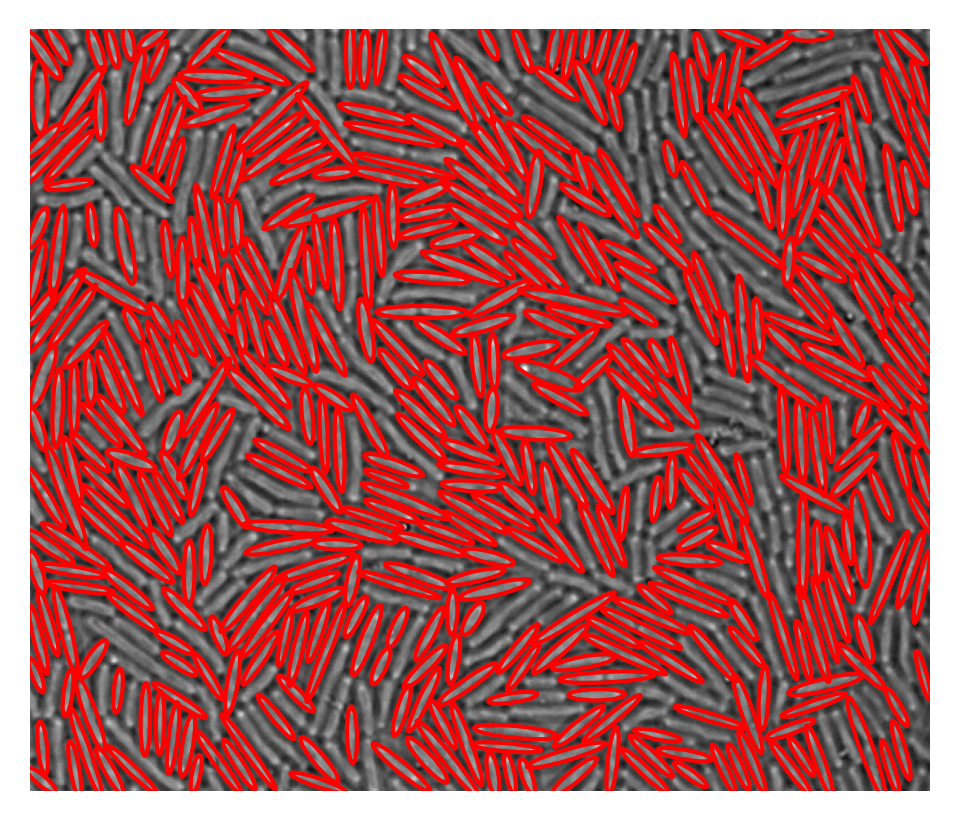

In [86]:
fig = plt.figure(figsize=(3, 3), dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.imshow(img, cmap='gray')
for num, i in traj.iterrows():
    elli = mpatch.Ellipse((i.Y, i.X), i.Minor, i.Major, 180- i.Angle / np.pi *180, ec='red', fc=(0,0,0,0))
    ax.add_patch(elli)
ax.axis('off')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B1732B5C08>,
      dtype=object)

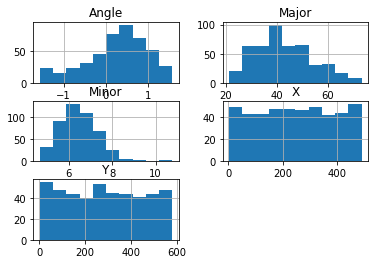

In [102]:
traj.hist()

In [88]:
MPP=0.1
major = traj.Major.mean() * MPP
minor = traj.Minor.mean() * MPP
volume = minor ** 2 / 4 * np.pi * major
volume

1.4146898981895633

In [99]:
major_err = traj.Major.std() * MPP
minor_err = traj.Minor.std() * MPP
err = (minor_err ** 2 * 2 + major_err ** 2) ** 0.5 * np.pi / 4

In [103]:
volume = (traj.Minor / 2) ** 2 * np.pi * traj.Major * MPP ** 3

In [105]:
print('Mean volume: {0:.2f} um3, err: {1:.2f} um3'.format(volume.mean(), volume.std()))

Mean volume: 1.46 um3, err: 0.63 um3


# Conlusion

The volume of a single PR (light-powered) bacterium is $1.46 \pm 0.63$ um$^3$.